### Import libraries 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

###  Dataset
 - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [2]:
# load the dataset
x_train = np.array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,  8.5781,  6.4862,
  5.0546,  5.7107, 14.164,   5.734,   8.4084,  5.6407,  5.3794,  6.3654,  5.1301,
  6.4296,  7.0708,  6.1891, 20.27,    5.4901,  6.3261,  5.5649, 18.945,  12.828,
 10.957,  13.176,  22.203,   5.2524,  6.5894,  9.2482,  5.8918,  8.2111,  7.9334,
  8.0959,  5.6063, 12.836,   6.3534,  5.4069,  6.8825, 11.708,   5.7737,  7.8247,
  7.0931,  5.0702,  5.8014, 11.7,     5.5416,  7.5402,  5.3077,  7.4239,  7.6031,
  6.3328,  6.3589,  6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279,
 14.908,  18.959,   7.2182,  8.2951, 10.236,   5.4994, 20.341,  10.136,   7.3345,
  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,  5.0365, 10.274,   5.1077,  5.7292,
  5.1884,  6.3557,  9.7687,  6.5159,  8.5172,  9.1802,  6.002,   5.5204,  5.0594,
  5.7077,  7.6366,  5.8707,  5.3054, 8.2934, 13.394,   5.4369]) 

y_train = np.array([17.592,    9.1302,  13.662,   11.854,    6.8233,  11.886,    4.3483,  12.,
  6.5987,   3.8166,  3.2522,  15.505,    3.1551,   7.2258,   0.71618,  3.5129,
  5.3048,   0.56077,  3.6518,   5.3893,   3.1386,  21.767,    4.263,    5.1875,
  3.0825,  22.638,   13.501,    7.0467,  14.692,   24.147,   -1.22,     5.9966,
 12.134,    1.8495,   6.5426,   4.5623,   4.1164,   3.3928,  10.117,    5.4974,
  0.55657,  3.9115,   5.3854,   2.4406,   6.7318,   1.0463,   5.1337,   1.844,
  8.0043,   1.0179,   6.7504,   1.8396,   4.2885,   4.9981,   1.4233,  -1.4211,
  2.4756,   4.6042,   3.9624,   5.4141,   5.1694,  -0.74279, 17.929,   12.054,
 17.054,    4.8852,   5.7442,   7.7754,   1.0173,  20.992,    6.6799,   4.0259,
  1.2784,   3.3411,  -2.6807,   0.29678,  3.8845,   5.7014,   6.7526,   2.0576,
  0.47953,  0.20421,  0.67861,  7.5435,   5.3436,   4.2415,   6.7981,   0.92695,
  0.152,    2.8214,   1.8451,   4.2959,   7.2029,   1.9869,   0.14454,  9.0551,
  0.61705])

In [3]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [4]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101
  

Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent the restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Check the dimensions of your variables

In [5]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

#### Visualize the data
- use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). 


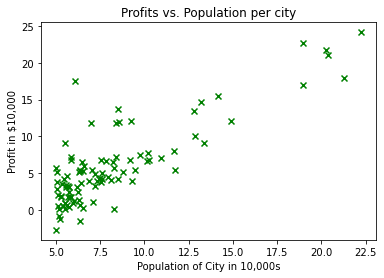

In [6]:
plt.scatter(x_train, y_train, marker='x', c='g') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

### Compute cost

In [7]:
# Computes the cost function for linear regression.

def compute_cost(x, y, w, b): 
    
    # number of training examples
    m = x.shape[0] 
    
    # initialization
    total_cost = 0
    cost_sum = 0
    
    #loop through the training examples
    for i in range(m):
        f_wb = w * x[i] + b
        
        cost = (f_wb - y[i])**2
        cost_sum += cost             # cost for all the training emaxples
    
    #total cost
    total_cost = (1 / (2*m) ) * cost_sum
    

    return total_cost

### Compute gradient  



In [8]:
# Computes the gradient for linear regression 

def compute_gradient(x, y, w, b):
    
    # Number of training examples
    m = x.shape[0]
    
    # initialization
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        
        #gradient for w, b
        dj_db_i = (f_wb - y[i])
        dj_dw_i = (f_wb - y[i]) * x[i]
        
        #update dj_dw, dj_db
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    
    dj_dw = (1 / m) * dj_dw
    dj_db = (1 / m) * dj_db
        
    return dj_dw, dj_db

### Compute gradient descent 
find the optimal parameters w,b of a linear regression model by using batch gradient descent


In [9]:
# Performs batch gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha
    
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
     
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [10]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74 
Iteration  150: Cost     5.31 
Iteration  300: Cost     4.96 
Iteration  450: Cost     4.76 
Iteration  600: Cost     4.64 
Iteration  750: Cost     4.57 
Iteration  900: Cost     4.53 
Iteration 1050: Cost     4.51 
Iteration 1200: Cost     4.50 
Iteration 1350: Cost     4.49 
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


- w : 1.166362350335582 
- b : -3.63029143940436

In [11]:
#To calculate the predictions on the entire dataset, 
#we can loop through all the training examples and calculate the prediction for each example

m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

Text(0.5, 0, 'Population of City in 10,000s')

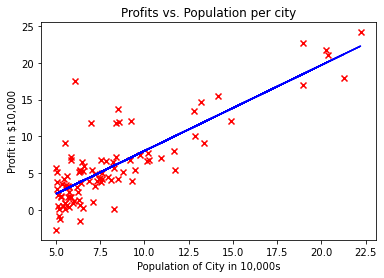

In [12]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

The final values of $w,b$ is use to make predictions on profits. 
Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 



In [13]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


<table>
  <tr>
      <td> <b> Population </td>
      <td> <b> Predicted profit </td>  
    </tr>
    <tr>
    <td> 35,000<b></td>
    <td> $4519.77 </td> 
  </tr>
  
  <tr>
    <td> 70,000</td>
    <td> $45342.45 </td> 
  </tr>
</table>